In [ ]:
path = '/content/drive/MyDrive/PRML_Proj/Language Detection.csv'

In [ ]:
import string 
import re
import codecs
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import feature_extraction
from sklearn import linear_model
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn import pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import itertools
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [ ]:
df = pd.read_csv(path)
df

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada


In [ ]:
X = df.iloc[:,0]
y = df.iloc[:,1]
le = LabelEncoder()
y = le.fit_transform(y)

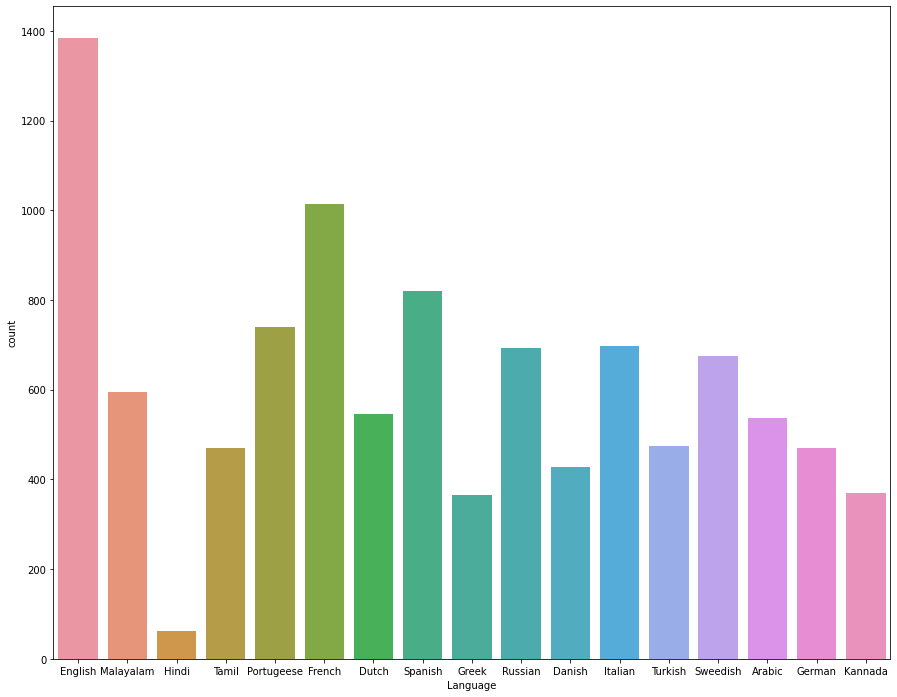

In [ ]:
plt.figure(figsize=(15,12))
sns.countplot(x = df['Language'], data=df)

In [ ]:
data_list = []
for text in X:
    text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
    text = re.sub(r'[[][  ]]', ' ', text)
    text = text.lower()
    data_list.append(text)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Possible nested set at position 1
  after removing the cwd from sys.path.


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data_list, y, test_size = 0.20)

In [ ]:
vectorizer = feature_extraction.text.TfidfVectorizer(ngram_range=(3,5), analyzer='char',lowercase=True)

In [ ]:
pipe_mnb = pipeline.Pipeline([
    ('vectorizer', vectorizer),
    ('clf', MultinomialNB())
])

In [ ]:
text_clf = pipeline.Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB())])

tuned_parameters = {
    'tfidf__ngram_range': [(3, 5), (3, 6), (4, 6)],
    'tfidf__use_idf': (True, False),
    'tfidf__norm': ('l1', 'l2'),
    'tfidf_analyzer':['char']
}
print(text_clf.get_params().keys())
clf = GridSearchCV(text_clf, tuned_parameters, cv=5, scoring='accuracy')
clf.fit(x_train, y_train)

dict_keys(['memory', 'steps', 'verbose', 'vect', 'tfidf', 'clf', 'vect__analyzer', 'vect__binary', 'vect__decode_error', 'vect__dtype', 'vect__encoding', 'vect__input', 'vect__lowercase', 'vect__max_df', 'vect__max_features', 'vect__min_df', 'vect__ngram_range', 'vect__preprocessor', 'vect__stop_words', 'vect__strip_accents', 'vect__token_pattern', 'vect__tokenizer', 'vect__vocabulary', 'tfidf__norm', 'tfidf__smooth_idf', 'tfidf__sublinear_tf', 'tfidf__use_idf', 'clf__alpha', 'clf__class_prior', 'clf__fit_prior'])


ValueError: ignored

In [ ]:
print(classification_report(y_test, clf.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      0.42      0.59       106
           1       0.86      0.42      0.56        91
           2       0.98      0.48      0.65       118
           3       0.21      0.98      0.35       261
           4       0.99      0.66      0.80       196
           5       1.00      0.44      0.61        78
           6       1.00      0.51      0.67        83
           7       1.00      0.54      0.70        13
           8       0.97      0.48      0.65       149
           9       1.00      0.27      0.43        77
          10       1.00      0.35      0.51       113
          11       0.92      0.60      0.73       161
          12       0.97      0.23      0.37       138
          13       0.96      0.58      0.72       157
          14       0.92      0.47      0.62       144
          15       1.00      0.53      0.69        78
          16       1.00      0.26      0.41       105

    accuracy              

In [ ]:
accuracy_score(y_test, clf.predict(x_test))

0.5299806576402321

In [ ]:
pipe_mnb.fit(x_train, y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(analyzer='char', ngram_range=(3, 5))),
                ('clf', MultinomialNB())])

In [ ]:
mnb_predicted = pipe_mnb.predict(x_test)
mnb_acc = (metrics.accuracy_score(y_test, mnb_predicted))*100
print('The MultinomialNB has :',mnb_acc,'% accuracy')

The MultinomialNB has : 95.88974854932302 % accuracy


In [ ]:
cv = CountVectorizer()
X_new = cv.fit_transform(data_list).toarray()
X_new

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.20)

In [ ]:
model1 = MultinomialNB()
model1.fit(x_train, y_train)
y_pred = model1.predict(x_test)
ac1 = accuracy_score(y_test, y_pred)
print(ac1)

0.9763056092843327


In [ ]:
model2 = GaussianNB()
model2.fit(x_train, y_train)
y_pred = model2.predict(x_test)
ac2 = accuracy_score(y_test, y_pred)
print(ac2)

0.9656673114119922
